In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import lightgbm
from xgboost import XGBClassifier
from xgboost import plot_importance
# from sklearn import feature_selection
# from collections import Counter
# from imblearn.combine import SMOTEENN

In [237]:
train = pd.read_excel('附件2上网业务用户满意度数据.xlsx')
test = pd.read_excel('附件4上网业务用户满意度预测数据.xlsx')

In [185]:
def missing(df):
    """计算缺失值和缺失率

    Args:
        df (dataframe): 

    Returns:
        dataframe: 
    """
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([missing_number, missing_percent], axis=1, keys=['missing_number', 'missing_percent'])
    return missing_data

In [186]:
train['用户'].nunique() == train.shape[0]

True

In [187]:
train.duplicated().sum()

0

In [188]:
# train_butnotin_test=[]
# for i in d.columns.values:
#     if i not in test.columns.values:
#         train_butnotin_test.append(i)
# test_butnotin_train=[]
# for i in test.columns.values:
#     if i not in d.columns.values:
#         test_butnotin_train.append(i)
# train_butnotin_test

In [189]:
# import missingno as msno
# msno.matrix(d.iloc[:,1:50],labels=1)

In [190]:
# msno.matrix(d.iloc[:,50:100],labels=1)

In [191]:
# msno.matrix(d.iloc[:,100:125],labels=1)

- 缺失值

In [192]:
# 125个变量，考虑缺失值和变量重要性剔除激活时间和发卡时间
for i in train.columns.values:
    print(i, train[i].isnull().sum())

用户 0
手机上网整体满意度 0
网络覆盖与信号强度 0
手机上网速度 0
手机上网稳定性 0
居民小区 0
办公室 0
高校 0
商业街 0
地铁 0
农村 0
高铁 0
其他，请注明 0
场景备注数据 6651
网络信号差/没有信号 0
显示有信号上不了网 0
上网过程中网络时断时续或时快时慢 0
手机上网速度慢 0
其他，请注明.1 0
现象备注数据 6881
看视频卡顿 0
打游戏延时大 0
打开网页或APP图片慢 0
下载速度慢 0
手机支付较慢 0
其他，请注明.2 0
APP大类备注 6953
爱奇艺 0
优酷 0
腾讯视频 0
芒果TV 0
搜狐视频 0
抖音 0
快手 0
火山 0
咪咕视频 0
其他，请注明.3 0
APP小类视频备注 6910
全部都卡顿 0
和平精英 0
王者荣耀 0
穿越火线 0
梦幻西游 0
龙之谷 0
梦幻诛仙 0
欢乐斗地主 0
部落冲突 0
炉石传说 0
阴阳师 0
其他，请注明.4 0
APP小类游戏备注 6977
全部游戏都卡顿 0
微信 0
手机QQ 0
淘宝 0
京东 0
百度 0
今日头条 0
新浪微博 0
拼多多 0
其他，请注明.5 0
APP小类上网备注 6949
全部网页或APP都慢 0
上网质差次数 6134
脱网次数 5924
重定向次数 3804
2G驻留时长 3804
微信质差次数 5708
王者荣耀质差次数 6679
高单价超套客户（集团） 0
高频高额超套客户（集团） 0
套外流量（MB） 0
套外流量费（元） 0
是否全月漫游用户 0
是否不限量套餐到达用户 0
年龄 0
性别 0
王者荣耀使用次数 414
游戏类APP使用天数 414
游戏类APP使用次数 414
王者荣耀使用天数 414
游戏类APP使用流量 414
抖音使用流量（MB） 0
今日头条使用流量 414
快手使用流量 414
优酷视频使用流量 414
腾讯视频使用流量 414
小视频系APP流量 0
阿里系APP流量 0
网易系APP流量 0
腾讯系APP流量 0
王者荣耀APP使用流量 0
蜻蜓FMAPP使用流量 0
饿了么使用流量 0
美团外卖使用流量 0
天猫使用流量 0
大众点评使用流量 0
滴滴出行使用流量 0
通信类应用流量 0
游戏类应用流量 0
网页类应用流量 0
音乐类应用流量 0
视频类应用流量 

In [239]:
# 缺失值过多的列直接丢掉
a = ['用户','其他，请注明', '场景备注数据','其他，请注明.1', '现象备注数据','其他，请注明.2','APP大类备注', 
'其他，请注明.3', 'APP小类视频备注','其他，请注明.4','APP小类游戏备注','其他，请注明.5', 'APP小类上网备注',
'操作系统','码号资源-激活时间','码号资源-发卡时间']
train = train.drop(a, axis=1)

In [240]:
# 缺失值大于4的行也剔除
train = train.drop(train[train.王者荣耀使用天数.isnull()].index,axis=0)
d = train.drop(train[train.终端类型.isnull()].index,axis=0)

In [241]:
train['近3个月平均消费（剔除通信账户支付）'].fillna(np.mean(train['近3个月平均消费（剔除通信账户支付）']), inplace=True)

In [242]:
a = ['上网质差次数','脱网次数','重定向次数','2G驻留时长','微信质差次数','王者荣耀质差次数']
for i in a:
    train[i].fillna(0, inplace=True)

In [243]:
train.shape

(6606, 109)

- 重编码
  

In [244]:
# 将终端品牌分为苹果，华为，小米和其他
def reindex(x):
    name=['苹果','华为','小米科技']
    if x not in name:
        x='其他'
    return x

train['终端品牌']=train['终端品牌'].apply(reindex)

In [245]:
# 查阅北京移动客户分级相关资料，客户星级重分类为（未评级准星一星二星）/（三星）/（银卡）/(金卡，白金卡，钻石卡)
def reindex(x):
    c1=['未评级','准星','一星','二星']
    c2=['三星']
    c3=['银卡']
    c4=['金卡','白金卡','钻石卡']
    if x in c1:
        x=1
    elif x in c2:
        x=2
    elif x in c3:
        x=3
    elif x in c4:
        x=4
    else:
        x
    return x

train['客户星级标识']=train['客户星级标识'].apply(reindex)

In [246]:
a = ['居民小区', '办公室', '高校','商业街', '地铁', '农村', '高铁',
'网络信号差/没有信号', '显示有信号上不了网','上网过程中网络时断时续或时快时慢', '手机上网速度慢',
'看视频卡顿', '打游戏延时大', '打开网页或APP图片慢','下载速度慢', '手机支付较慢', 
'爱奇艺', '优酷', '腾讯视频', '芒果TV', '搜狐视频', '抖音', '快手','火山', '咪咕视频','全部都卡顿',
 '和平精英', '王者荣耀', '穿越火线', '梦幻西游', '龙之谷','梦幻诛仙', '欢乐斗地主', '部落冲突', '炉石传说', '阴阳师', '全部游戏都卡顿',
 '微信', '手机QQ','淘宝', '京东', '百度', '今日头条', '新浪微博', '拼多多','全部网页或APP都慢']
def reindex(x):
       if x == -1:
              x=0
       else:
              x=1
       return x

for i in a:
       train[i] = train[i].apply(reindex)

In [247]:
# 删除变量中超过同一类超过95%的变量，方差太小，没有信息;重复信息;kappa检验一致性显著变量
train = train.drop(['终端类型', '终端制式', '终端品牌类型','高频高额超套客户（集团）','畅享套餐名称','是否全月漫游用户','是否校园套餐用户',
'王者荣耀使用天数','游戏类APP使用天数','套外流量费（元）',], axis=1)

In [248]:
# a = ['高单价超套客户（集团）','是否不限量套餐到达用户',
# '是否校园套餐用户', '校园卡无校园合约用户', '校园卡校园合约捆绑用户',
# '是否5G网络客户',
# '畅享套餐档位', '主套餐档位']
a = ['校园卡无校园合约用户', '校园卡校园合约捆绑用户']
def reindex(x):
       if x == '否':
              x=0
       else:
              x=1
       return x

for i in a:
       train[i] = train[i].apply(reindex)
# kappa一致性检验显示'是否校园套餐用户'与'校园卡无校园合约用户', '校园卡校园合约捆绑用户'之间存在极强的一致性关系，故删除'是否校园套餐用户'

- 异常值(逻辑判断)

In [249]:
# 删除明显矛盾的行，比如王者荣耀使用流量为0，但王者荣耀打开次数不为0，或者情况相反的观测
train.drop(train[(train.王者荣耀APP使用流量==0) & (train.王者荣耀使用次数!=0)].index, axis=0, inplace=True)
# 删除王者荣耀使用流量为0，但王者荣耀质差次数不为0的观测
train.drop(train[(train.王者荣耀APP使用流量==0) & (train.王者荣耀质差次数!=0)].index, axis=0, inplace=True)

In [250]:
# 删除游戏类APP使用次数为0，但王者荣耀质差次数不为0的观测
train.drop(train[(train.游戏类APP使用次数==0) & (train.王者荣耀质差次数!=0)].index, axis=0, inplace=True)
# 删除腾讯APP流量为0，但微信质差次数不为0的观测
train.drop(train[(train.腾讯系APP流量==0) & (train.微信质差次数!=0)].index, axis=0, inplace=True)
# 删除通信类应用流量为0，但微信质差次数不为0的观测
train.drop(train[(train.通信类应用流量==0) & (train.微信质差次数!=0)].index, axis=0, inplace=True)

In [251]:
# 删除年龄为0的观测
train.drop(train[train.年龄==0].index, axis=0, inplace=True)
# 删除年累计消费为0，但主套餐或畅想套餐不为0的观测
train.drop(train[(train['本年累计消费（元）']==0) & ((train['畅享套餐档位']!=0) | (train['主套餐档位']!=0))].index, axis=0, inplace=True)

In [252]:
train = train.reset_index(drop=True)

- 异常值(定量变量)

In [253]:
# '近3个月平均消费（剔除通信账户支付）', '近3个月平均消费（元）', '本年累计消费（元）'强相关，剔除两个变量
train = train.drop(['本年累计消费（元）','近3个月平均消费（元）'], axis=1)

In [208]:
numcols = ['2G驻留时长','套外流量（MB）','游戏类APP使用流量', '抖音使用流量（MB）', '今日头条使用流量', '快手使用流量', '优酷视频使用流量',
'腾讯视频使用流量', '小视频系APP流量', '阿里系APP流量', '网易系APP流量', '腾讯系APP流量',
'王者荣耀APP使用流量', '蜻蜓FMAPP使用流量', '饿了么使用流量', '美团外卖使用流量', '天猫使用流量',
'大众点评使用流量', '滴滴出行使用流量', '通信类应用流量', '游戏类应用流量', '网页类应用流量', '音乐类应用流量',
'视频类应用流量', '邮箱类应用流量','畅享套餐档位', '主套餐档位',
'当月MOU', '近3个月平均消费（剔除通信账户支付）']
numcols.__len__()


29

In [209]:
# fig=plt.figure(figsize=(80,60))
# for i in range(len(numcols)):
#     plt.subplot(6,5,i+1)
#     sns.boxplot(train[numcols[i]],orient='v',width=0.5)
#     plt.ylabel(numcols[i],fontsize=40)
# plt.show()

- 重编码

In [210]:
train.loc[train[train['性别']=='男'].index, '性别']=0
train.loc[train[train['性别']=='女'].index, '性别']=1
train.loc[train[train['性别']=='性别不详'].index, '性别']=2

In [211]:
train.groupby('性别')['性别'].count()

性别
0    3893
1    2128
2     365
Name: 性别, dtype: int64

In [212]:
ohc_list = ['终端品牌', '是否5G网络客户','高单价超套客户（集团）','是否不限量套餐到达用户','当月高频通信分公司']
ohc = preprocessing.OneHotEncoder(drop='if_binary')
a = pd.DataFrame(ohc.fit_transform(train[ohc_list]).toarray(), columns=ohc.get_feature_names_out())
train = pd.concat([train, a], axis=1)
train = train.drop(ohc_list,axis=1)

In [213]:
def x_y_split(data):
    """切分数据框,x在前y在后,按顺序返回x,y1,y2,y3,y4

    Args:
        data (dataframe): X-Y
    """
    x = data.iloc[:, 4:]
    y0 = data.iloc[:, 0]
    y1 = data.iloc[:, 1]
    y2 = data.iloc[:, 2]
    y3 = data.iloc[:, 3]
    return x, y0, y1, y2, y3


verify = train.sample(n=1800, replace=False)
trn = train.drop(verify.index)
x, y0, y1, y2, y3 = x_y_split(trn)
v_x, v_y0, v_y1, v_y2, v_y3 = x_y_split(verify)

In [214]:
for i in range(4):
    rfc = RandomForestClassifier(criterion='gini',min_samples_leaf=5,min_samples_split=5,bootstrap=1,oob_score=1)
    rfc.fit(x, y0)
    print(f'第{i}次测试：')
    print('Training Accuracy : ',accuracy_score(y0, rfc.predict(x))*100)
    print('Validation Accuracy : ',accuracy_score(v_y0, rfc.predict(v_x))*100)
    print('out-of-bagging Accuracy:',rfc.oob_score_*100)

第0次测试：
Training Accuracy :  79.74269515918012
Validation Accuracy :  43.388888888888886
out-of-bagging Accuracy: 45.22459659834278
第1次测试：
Training Accuracy :  79.96075010902747
Validation Accuracy :  44.0
out-of-bagging Accuracy: 44.96293065852595
第2次测试：
Training Accuracy :  79.87352812908853
Validation Accuracy :  44.05555555555555
out-of-bagging Accuracy: 45.42084605320541
第3次测试：
Training Accuracy :  79.54644570431749
Validation Accuracy :  44.27777777777778
out-of-bagging Accuracy: 45.050152638464894


- 特征工程

In [215]:
train_1 = train.copy()

Text(0.5, 0, 'Random Forest Feature Importance')

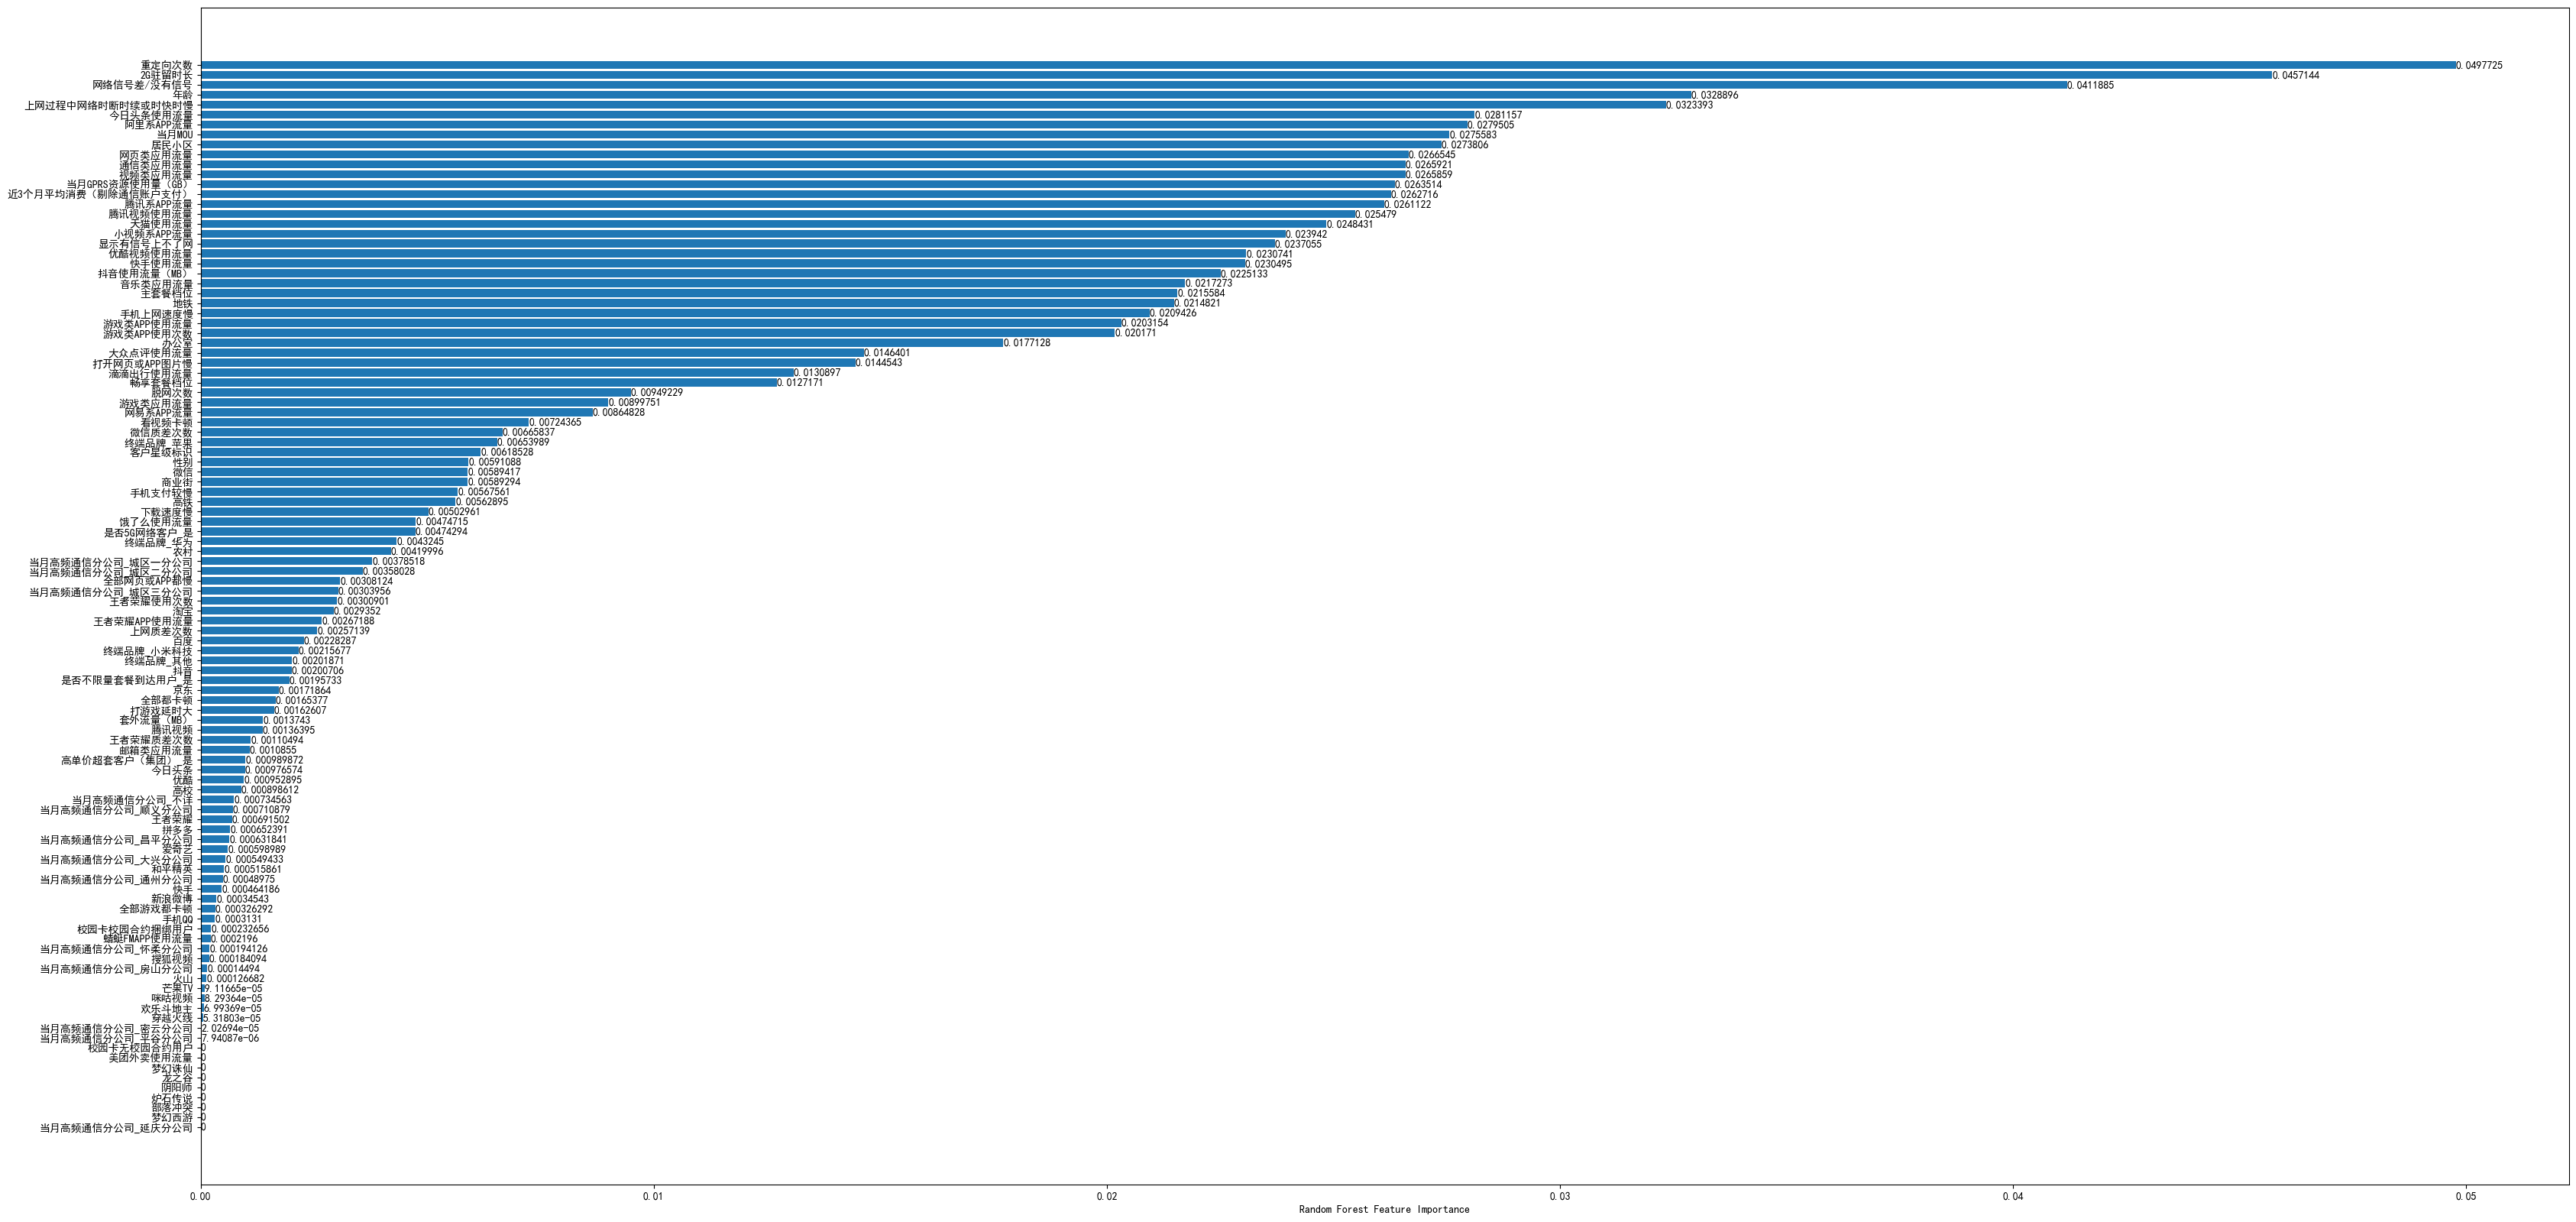

In [216]:
sorted_idx = rfc.feature_importances_.argsort()
plt.figure(figsize=(40,20))
p = plt.barh(rfc.feature_names_in_[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.bar_label(p)
plt.xlabel("Random Forest Feature Importance")

In [217]:
# # 删除重要性低于0.001的变量
# sorted_idx = rfc.feature_importances_.argsort()
# num = rfc.feature_importances_[sorted_idx]
# name = rfc.feature_names_in_[sorted_idx]

# sel = {}
# drop_list = []
# for i,j in zip(name,num):
#     if j>0.001:
#         sel[i] = j
#     else:
#         drop_list.append(i)

# train_1 = train_1.drop(drop_list,axis=1)


In [219]:
# 构建三大分项特征
train_1['网络覆盖范围问题']=train_1['居民小区']+train_1['办公室']+train_1['高校']+train_1['商业街']+train_1['地铁']+train_1['农村']+train_1['高铁']
train_1['信号强度问题']=train_1['网络信号差/没有信号']+train_1['显示有信号上不了网']+train_1['脱网次数']+train_1['2G驻留时长']
train_1['上网速度问题']=train_1['手机上网速度慢']+train_1['下载速度慢']+train_1['打开网页或APP图片慢']+train_1['手机支付较慢']
train_1['上网稳定性问题']=train_1['上网过程中网络时断时续或时快时慢']+train_1['重定向次数']+train_1['上网质差次数']

In [220]:
# 构建游戏，视频，网页或APP三大场景特征
train_1['游戏流量']=train_1['游戏类APP使用流量']+train_1['王者荣耀APP使用流量']+train_1['游戏类应用流量']
train_1['视频流量']=train_1['抖音使用流量（MB）']+train_1['快手使用流量']+train_1['优酷视频使用流量']+train_1['腾讯视频使用流量']+train_1['小视频系APP流量']+train_1['视频类应用流量']
train_1['网页和APP流量']=train_1['蜻蜓FMAPP使用流量']+train_1['饿了么使用流量']+train_1['美团外卖使用流量']+train_1['天猫使用流量']+train_1['大众点评使用流量']+train_1['滴滴出行使用流量']+train_1['今日头条使用流量']+train_1['通信类应用流量']+train_1['网页类应用流量']+train_1['邮箱类应用流量']+train_1['音乐类应用流量']

In [223]:
# 构建游戏，视频，网页或APP四大场景问题次数
train_1['游戏问题']=train_1['打游戏延时大']+train_1['和平精英']+train_1['王者荣耀']+train_1['穿越火线']+train_1['梦幻西游']+train_1['龙之谷']+train_1['梦幻诛仙']+train_1['欢乐斗地主']+train_1['部落冲突']+train_1['炉石传说']+train_1['阴阳师']+train_1['全部游戏都卡顿']
train_1['视频问题']=train_1['看视频卡顿']+train_1['爱奇艺']+train_1['优酷']+train_1['腾讯视频']+train_1['芒果TV']+train_1['搜狐视频']+train_1['抖音']+train_1['快手']+train_1['火山']+train_1['咪咕视频']+train_1['全部都卡顿']
train_1['网页或APP问题']=train_1['微信']+train_1['手机QQ']+train_1['淘宝']+train_1['百度']+train_1['今日头条']+train_1['新浪微博']+train_1['拼多多']+train_1['全部网页或APP都慢']

In [227]:
verify = train_1.sample(n=1800, replace=False)
trn = train_1.drop(verify.index)
x, y0, y1, y2, y3 = x_y_split(trn)
v_x, v_y0, v_y1, v_y2, v_y3 = x_y_split(verify)
for i in range(4):
    rfc = RandomForestClassifier(criterion='gini',min_samples_leaf=5,min_samples_split=5,bootstrap=1,oob_score=1)
    rfc.fit(x, y0)
    print(f'第{i}次测试：')
    print('Training Accuracy : ',accuracy_score(y0, rfc.predict(x))*100)
    print('Validation Accuracy : ',accuracy_score(v_y0, rfc.predict(v_x))*100)
    print('out-of-bagging Accuracy:',rfc.oob_score_*100)

第0次测试：
Training Accuracy :  80.74574792847797
Validation Accuracy :  44.27777777777778
out-of-bagging Accuracy: 45.26820758831225
第1次测试：
Training Accuracy :  80.52769297863061
Validation Accuracy :  45.166666666666664
out-of-bagging Accuracy: 44.483209768861755
第2次测试：
Training Accuracy :  81.02921936327955
Validation Accuracy :  44.44444444444444
out-of-bagging Accuracy: 44.635848233754906
第3次测试：
Training Accuracy :  80.83296990841691
Validation Accuracy :  45.5
out-of-bagging Accuracy: 44.39598778892281


Text(0.5, 0, 'Random Forest Feature Importance')

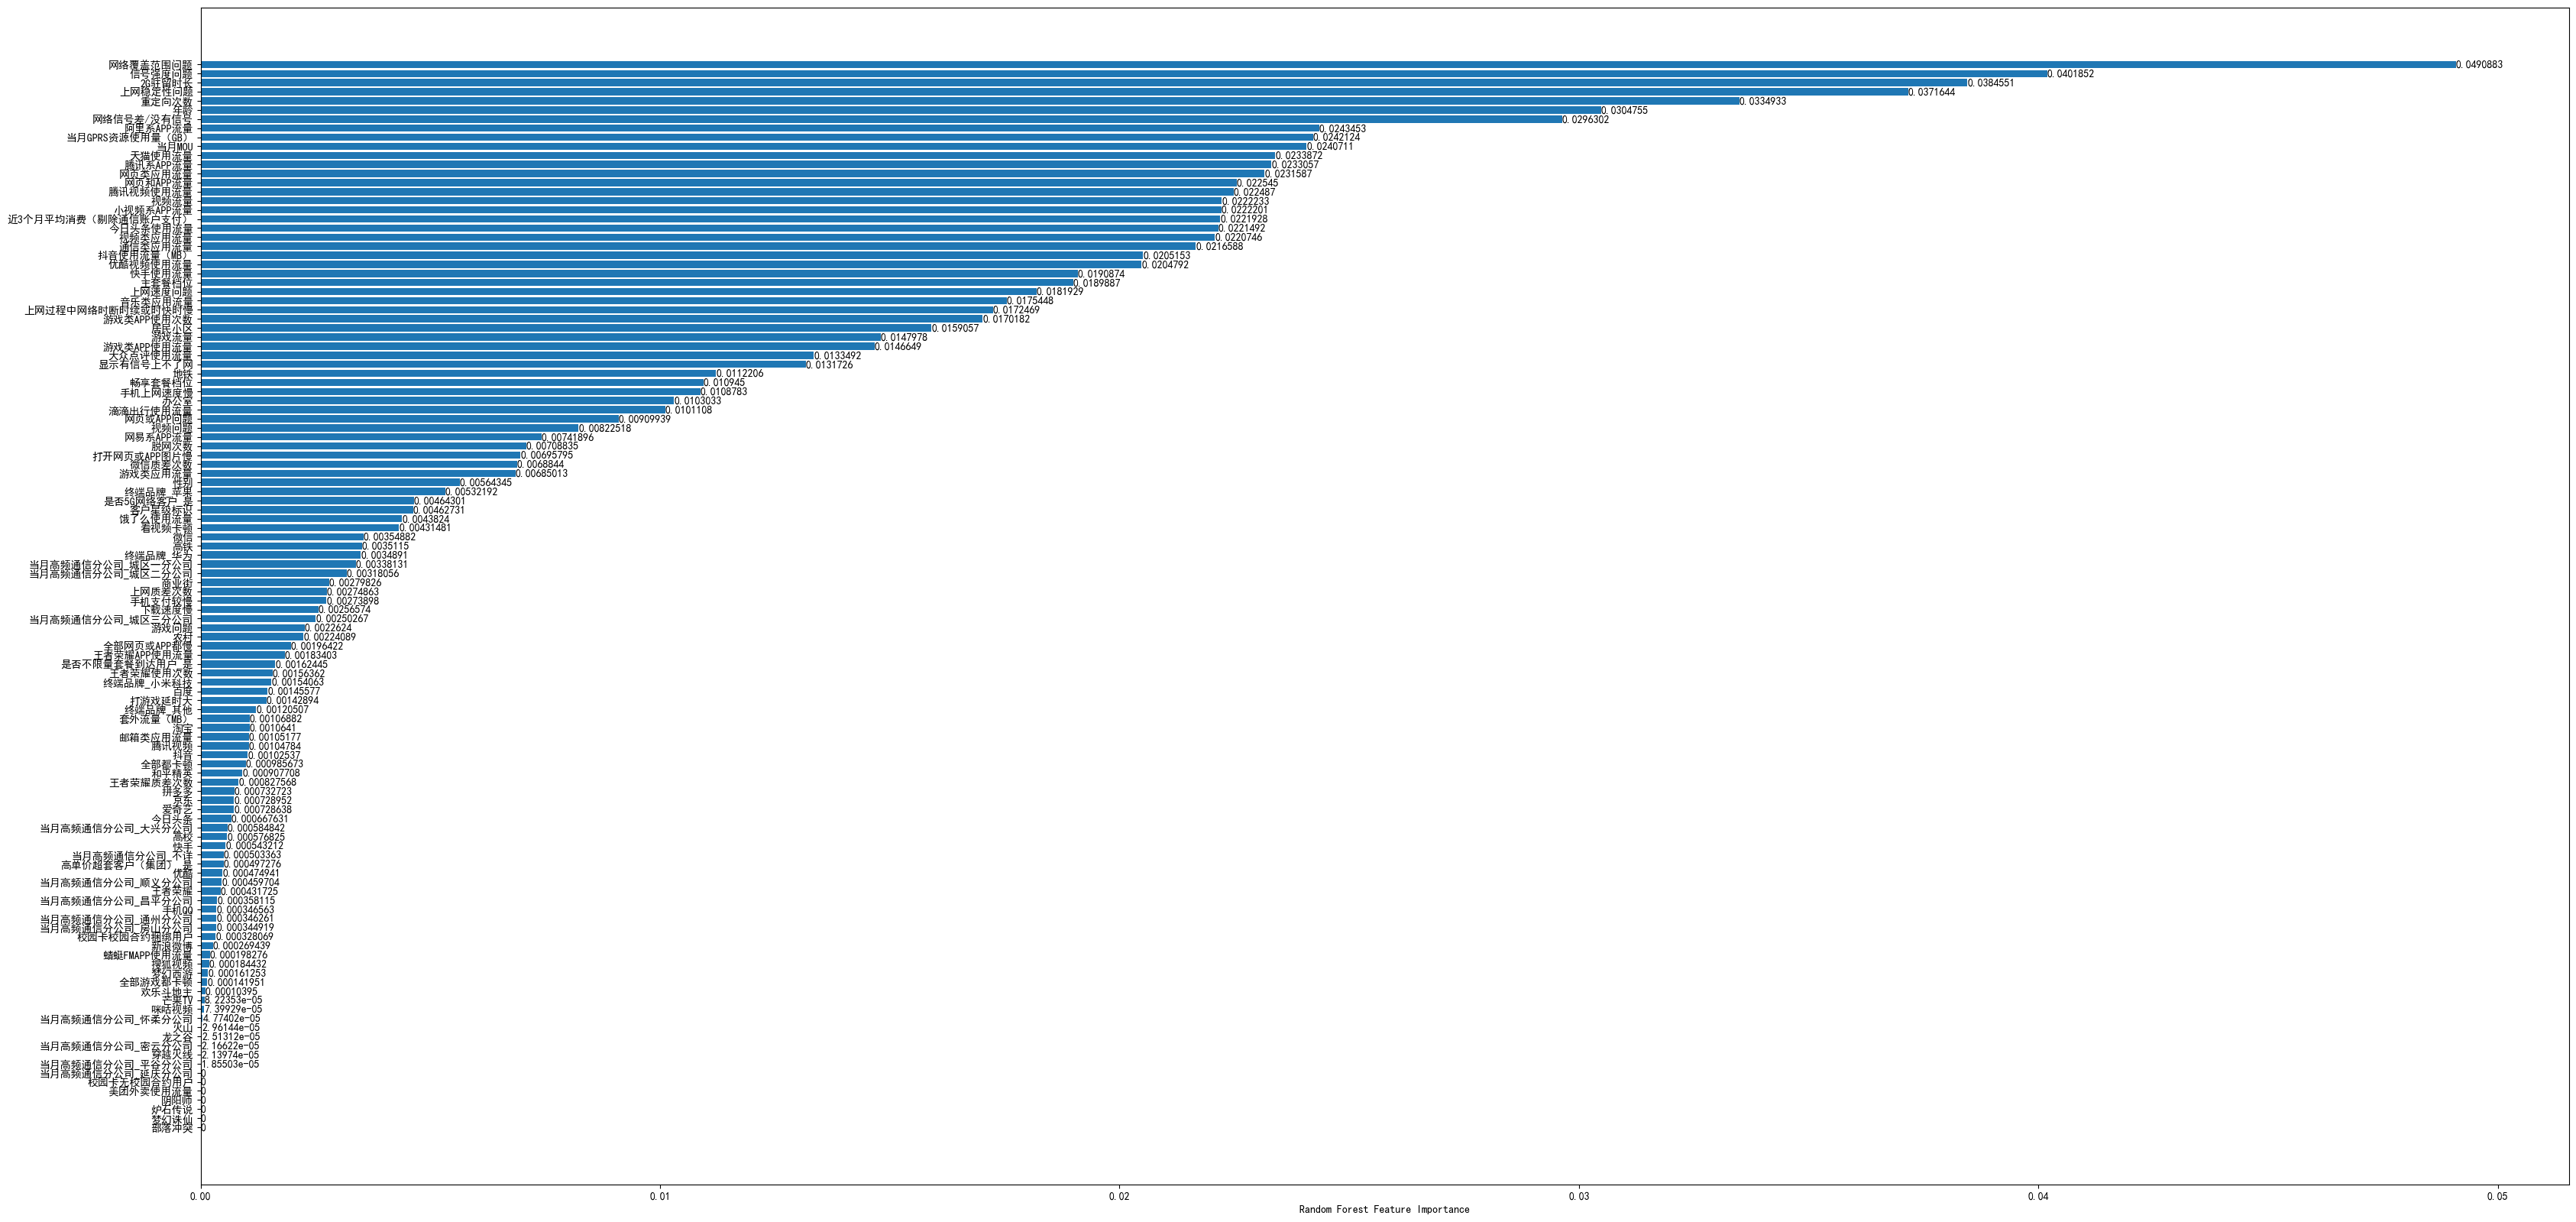

In [228]:
sorted_idx = rfc.feature_importances_.argsort()
plt.figure(figsize=(40,20))
p = plt.barh(rfc.feature_names_in_[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.bar_label(p)
plt.xlabel("Random Forest Feature Importance")

In [232]:
# 删除重要性低于0.01的变量
sorted_idx = rfc.feature_importances_.argsort()
num = rfc.feature_importances_[sorted_idx]
name = rfc.feature_names_in_[sorted_idx]

sel = {}
drop_list = []
for i,j in zip(name,num):
    if j>0.01:
        sel[i] = j
    else:
        drop_list.append(i)

train_1 = train_1.drop(drop_list,axis=1)

In [233]:
verify = train_1.sample(n=1800, replace=False)
trn = train_1.drop(verify.index)
x, y0, y1, y2, y3 = x_y_split(trn)
v_x, v_y0, v_y1, v_y2, v_y3 = x_y_split(verify)
for i in range(4):
    rfc = RandomForestClassifier(criterion='gini',min_samples_leaf=5,min_samples_split=5,bootstrap=1,oob_score=1)
    rfc.fit(x, y0)
    print(f'第{i}次测试：')
    print('Training Accuracy : ',accuracy_score(y0, rfc.predict(x))*100)
    print('Validation Accuracy : ',accuracy_score(v_y0, rfc.predict(v_x))*100)
    print('out-of-bagging Accuracy:',rfc.oob_score_*100)

第0次测试：
Training Accuracy :  82.18491059747056
Validation Accuracy :  46.0
out-of-bagging Accuracy: 43.720017444395985
第1次测试：
Training Accuracy :  82.77365896205843
Validation Accuracy :  45.38888888888889
out-of-bagging Accuracy: 43.894461404273876
第2次测试：
Training Accuracy :  82.49018752725686
Validation Accuracy :  46.05555555555556
out-of-bagging Accuracy: 43.7854339293502
第3次测试：
Training Accuracy :  82.83907544701265
Validation Accuracy :  46.88888888888889
out-of-bagging Accuracy: 44.15612734409071


Text(0.5, 0, 'Random Forest Feature Importance')

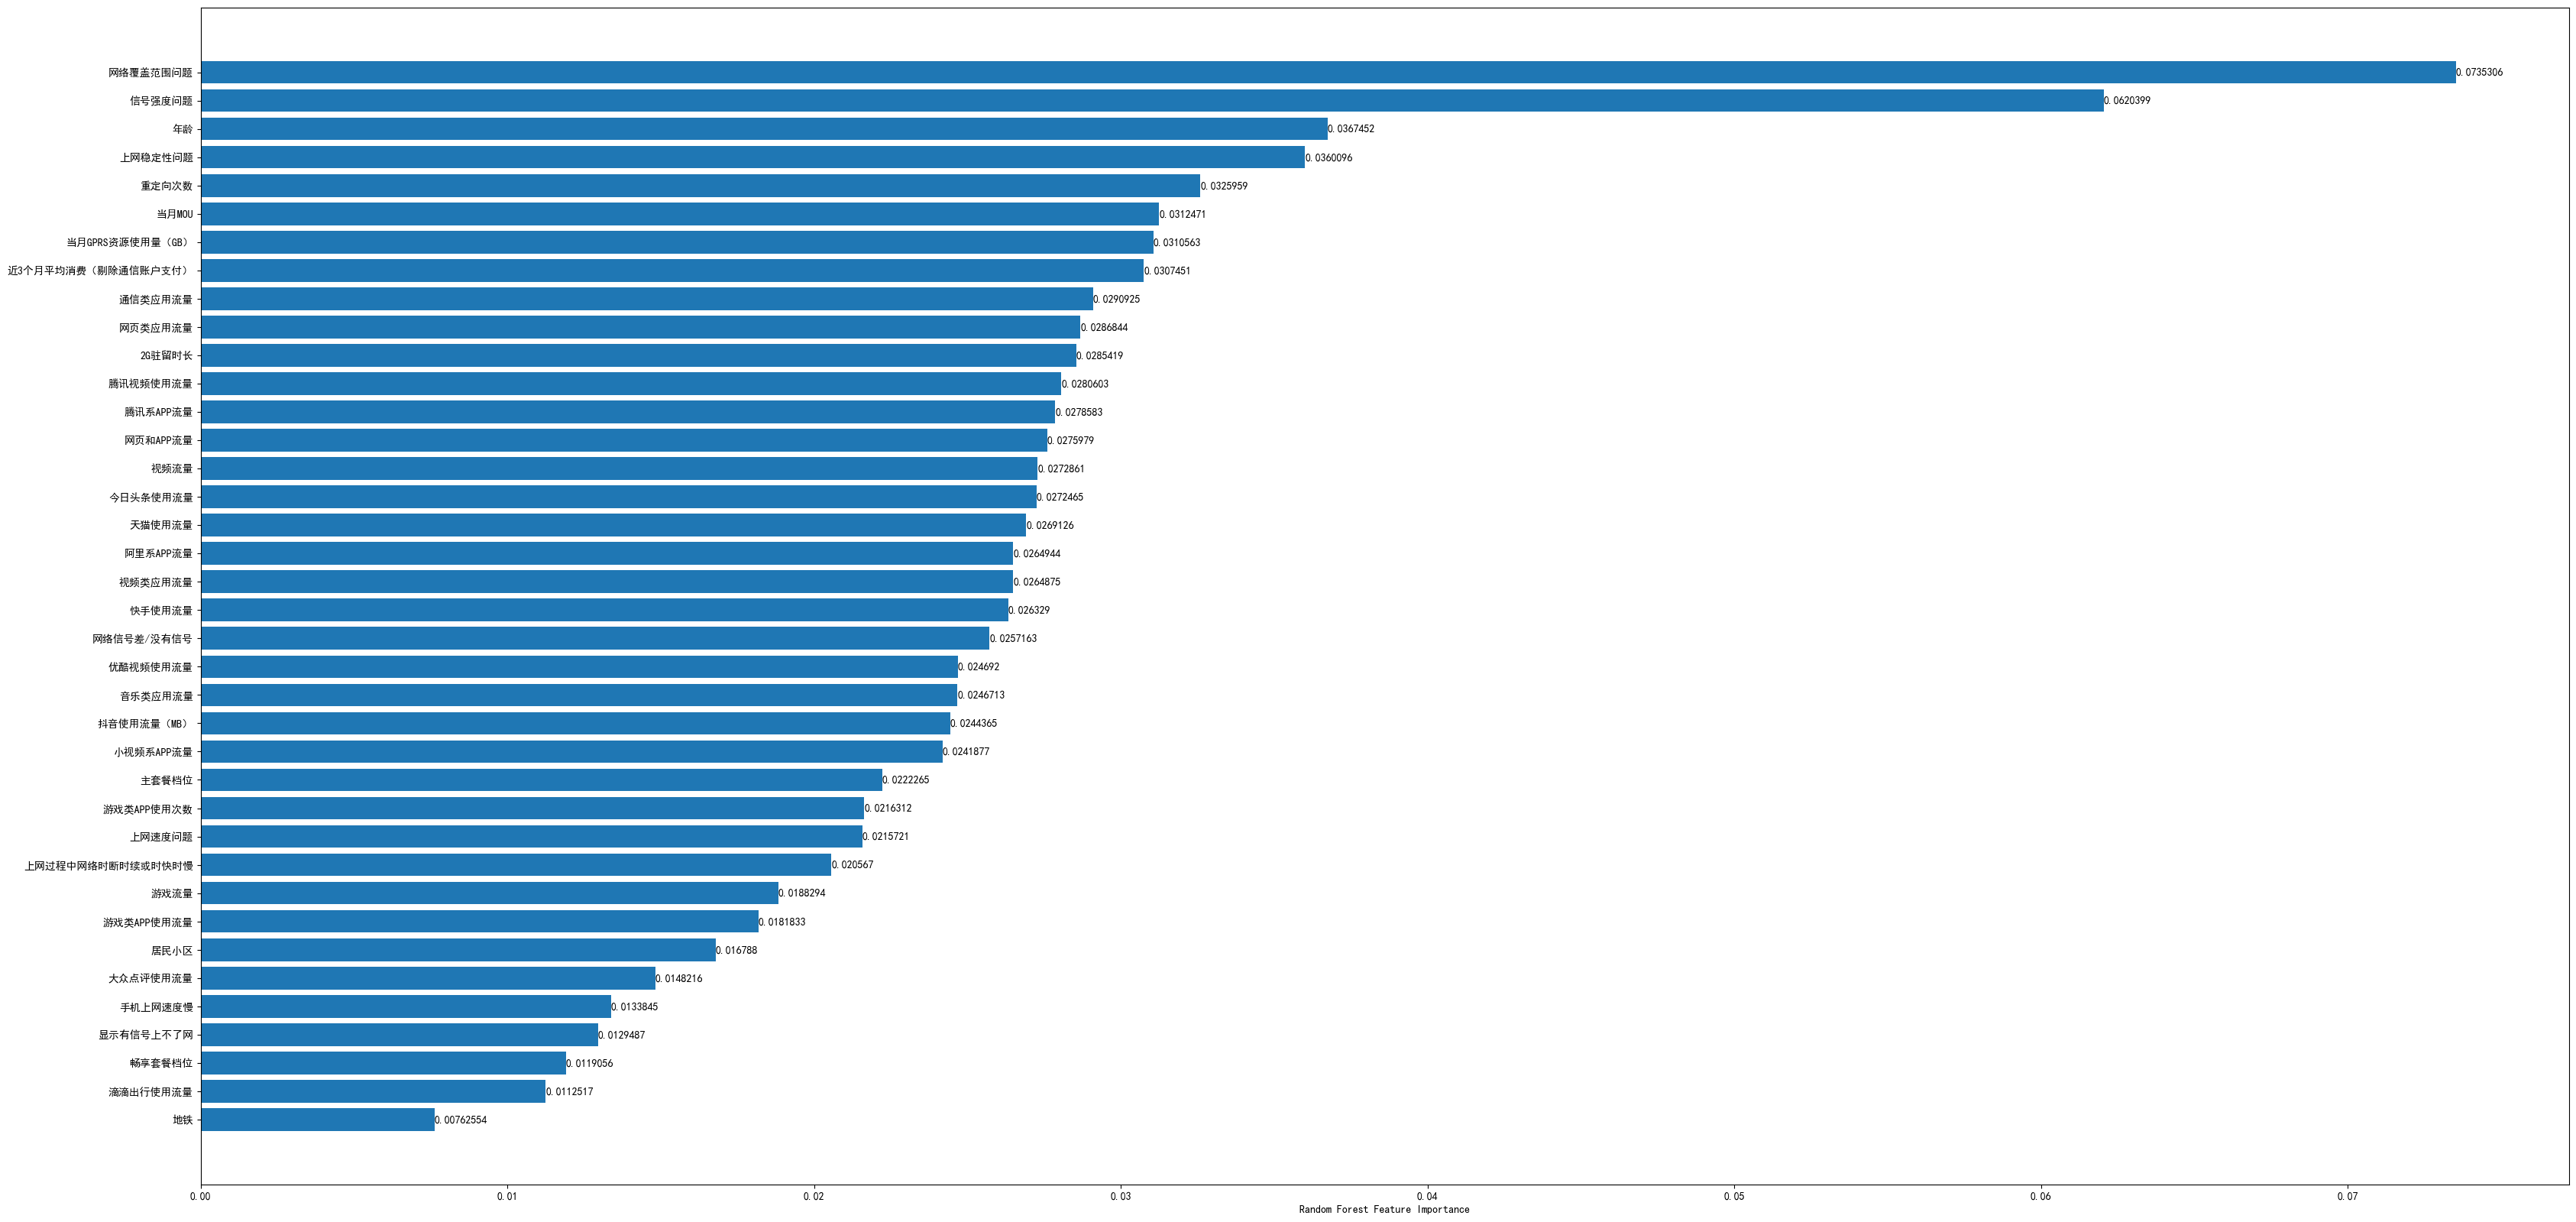

In [234]:
sorted_idx = rfc.feature_importances_.argsort()
plt.figure(figsize=(40,20))
p = plt.barh(rfc.feature_names_in_[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.bar_label(p)
plt.xlabel("Random Forest Feature Importance")

In [236]:
train_1.columns.values

array(['手机上网整体满意度', '网络覆盖与信号强度', '手机上网速度', '手机上网稳定性', '居民小区', '地铁',
       '网络信号差/没有信号', '显示有信号上不了网', '上网过程中网络时断时续或时快时慢', '手机上网速度慢', '重定向次数',
       '2G驻留时长', '年龄', '游戏类APP使用次数', '游戏类APP使用流量', '抖音使用流量（MB）',
       '今日头条使用流量', '快手使用流量', '优酷视频使用流量', '腾讯视频使用流量', '小视频系APP流量',
       '阿里系APP流量', '腾讯系APP流量', '天猫使用流量', '大众点评使用流量', '滴滴出行使用流量',
       '通信类应用流量', '网页类应用流量', '音乐类应用流量', '视频类应用流量', '当月GPRS资源使用量（GB）',
       '畅享套餐档位', '主套餐档位', '当月MOU', '近3个月平均消费（剔除通信账户支付）', '网络覆盖范围问题',
       '信号强度问题', '上网速度问题', '上网稳定性问题', '游戏流量', '视频流量', '网页和APP流量'],
      dtype=object)

- 训练集和测试集对比

In [254]:
train_butnotin_test=[]
for i in d.columns.values:
    if i not in test.columns.values:
        train_butnotin_test.append(i)
test_butnotin_train=[]
for i in test.columns.values:
    if i not in d.columns.values:
        test_butnotin_train.append(i)
train_butnotin_test

['手机上网整体满意度',
 '网络覆盖与信号强度',
 '手机上网速度',
 '手机上网稳定性',
 '重定向次数',
 '2G驻留时长',
 '王者荣耀质差次数',
 '高单价超套客户（集团）',
 '高频高额超套客户（集团）',
 '是否全月漫游用户',
 '年龄',
 '王者荣耀使用次数',
 '游戏类APP使用天数',
 '游戏类APP使用次数',
 '王者荣耀使用天数',
 '游戏类APP使用流量',
 '抖音使用流量（MB）',
 '今日头条使用流量',
 '快手使用流量',
 '优酷视频使用流量',
 '腾讯视频使用流量',
 '小视频系APP流量',
 '阿里系APP流量',
 '网易系APP流量',
 '腾讯系APP流量',
 '王者荣耀APP使用流量',
 '蜻蜓FMAPP使用流量',
 '饿了么使用流量',
 '美团外卖使用流量',
 '天猫使用流量',
 '大众点评使用流量',
 '滴滴出行使用流量',
 '通信类应用流量',
 '游戏类应用流量',
 '网页类应用流量',
 '音乐类应用流量',
 '视频类应用流量',
 '邮箱类应用流量',
 '终端类型',
 '终端制式',
 '当月GPRS资源使用量（GB）',
 '是否校园套餐用户',
 '校园卡无校园合约用户',
 '校园卡校园合约捆绑用户',
 '当月高频通信分公司',
 '畅享套餐档位',
 '畅享套餐名称',
 '主套餐档位',
 '近3个月平均消费（剔除通信账户支付）',
 '近3个月平均消费（元）',
 '本年累计消费（元）']

In [255]:
test_butnotin_train

['用户id',
 '是否遇到网络问题',
 '其他，请注明',
 '注明内容',
 '其他，请注明.1',
 '注明内容.1',
 '其他，请注明.2',
 nan,
 '学习强国',
 '其他，请注明.3',
 '注明内容.2',
 '其他，请注明.4',
 '注明内容.3',
 '学习强国.1',
 '其他，请注明.5',
 '注明内容.4',
 '是否投诉',
 '4\\5G用户',
 '是否关怀用户',
 '是否4G网络客户（本地剔除物联网）',
 '外省语音占比',
 '语音通话-时长（分钟）',
 '省际漫游-时长（分钟）',
 '当月ARPU',
 '前3月ARPU',
 '前3月MOU',
 '外省流量占比',
 'GPRS总流量（KB）',
 'GPRS-国内漫游-流量（KB）']